# データ数が同一になるようにビン分割を行う

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# 年齢データの生成
## 平均40, 標準偏差10, 1000サンプル
age = np.random.normal(40, 10, 1000)

# 最大99.9, 最小0に丸める
age[age < 0] = 0.0
age[age > 99.9] = 99.9

(array([   2.,   21.,   80.,  178.,  242.,  236.,  161.,   57.,   18.,    5.]),
 array([  7.98061188,  14.57871862,  21.17682535,  27.77493209,
         34.37303882,  40.97114556,  47.56925229,  54.16735903,
         60.76546576,  67.3635725 ,  73.96167923]),
 <a list of 10 Patch objects>)

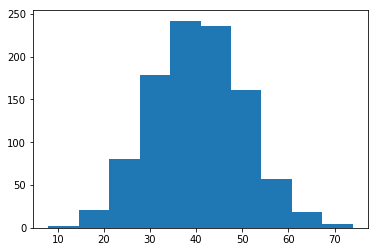

In [3]:
# 年齢データのヒストグラム
plt.hist(age)

In [4]:
# 10分割
age_ctgr = pd.qcut(age, q=10)

In [5]:
# 分割結果を確認
age_ctgr

[(53.119, 73.962], (53.119, 73.962], (48.62, 53.119], (45.752, 48.62], (37.811, 40.421], ..., (40.421, 43.053], (34.998, 37.811], (45.752, 48.62], (53.119, 73.962], (34.998, 37.811]]
Length: 1000
Categories (10, interval[float64]): [(7.98, 27.462] < (27.462, 31.976] < (31.976, 34.998] < (34.998, 37.811] ... (43.053, 45.752] < (45.752, 48.62] < (48.62, 53.119] < (53.119, 73.962]]

<Container object of 10 artists>

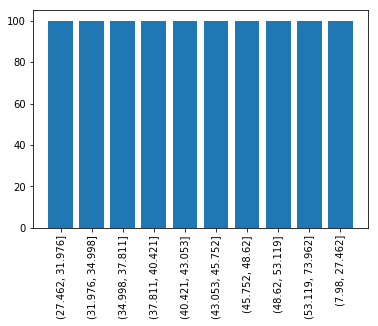

In [6]:
# カテゴリごとに集計しplot
plot_data = age_ctgr.value_counts().sort_index()
x_labels = [str(ctgr) for ctgr in plot_data.index]

plt.xticks(rotation=90)
plt.bar(x_labels, plot_data)

<Container object of 10 artists>

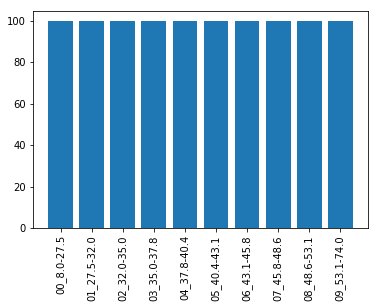

In [7]:
# カテゴリごとに集計しラベルが昇順になるようにplot
age_ctgr, bin_def = pd.qcut(age, q=10, retbins=True)
age_ctgr_name = ['{:02}_{:.1f}-{:.1f}'.format(i, bin_def[i], bin_def[i+1]) for i in range(len(bin_def)-1)]
age_ctgr = pd.qcut(age, q=10, labels=age_ctgr_name)

plot_data = age_ctgr.value_counts().sort_index()
x_labels = [str(ctgr) for ctgr in plot_data.index]

plt.xticks(rotation=90)
plt.bar(x_labels, plot_data)